# ガウス混合モデル

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
X, y_true = make_blobs(n_samples=400, centers=4,
                                           cluster_std=0.60, random_state=0)
X = X[:, ::-1]

In [4]:
from sklearn.cluster import KMeans

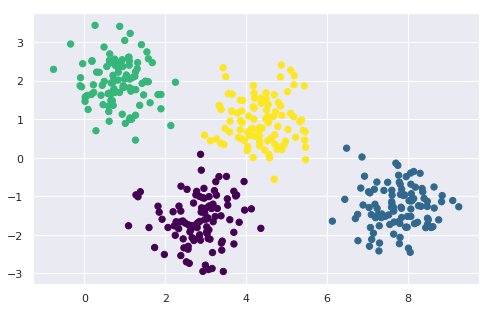

In [5]:
kmeans = KMeans(4, random_state=0)
labels =kmeans.fit(X).predict(X)
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [6]:
from scipy.spatial.distance import cdist

In [11]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    plt.figure(figsize=(8, 5))
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

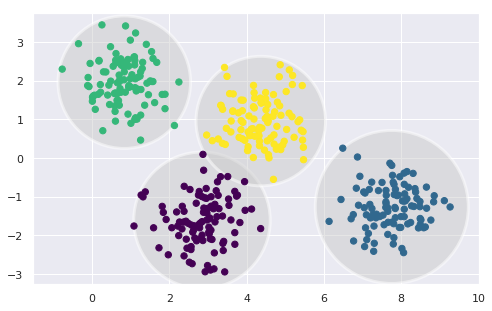

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [ ]:
rng = np.random.RandomState(13)
X_stret